In [8]:
#Firstly I need to import libraries and setting some default display options

# Importing libraries and Setting Dislplay Options

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


import statsmodels.api as sm
from sklearn import metrics
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats


from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score


#Setting Options
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [9]:
player_list= pd.read_pickle("C:/Users/adhna/OneDrive/Desktop/Valuation/scrape-final")
player_list

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,A. Mac Allister,23,80,84,Brighton &amp; Hove Albion,176,72,Right,82,CAM,4,30.00,0.06500,59.30,375,79,78,61,83,74,408,80,83,82,81,82,370,73,68,73,80,76,374,78,64,82,69,81,368,64,64,78,81,81,81,209,72,72,65,56,7,10,14,15,10,2160,450,1,70,79,81,80,69,71
5,O. Kökçü,21,81,86,Feyenoord,175,68,Right,83,CM,5,39.50,0.01200,58.30,346,78,71,41,84,72,408,77,82,82,84,83,378,75,69,81,73,80,377,77,60,87,70,83,393,85,72,75,84,77,77,207,68,71,68,43,9,6,10,6,12,2152,453,2,72,75,83,79,67,77
6,E. Dick,27,58,60,Minnesota United,196,93,Right,58,GK,2,0.19,0.00100,0.29,79,9,10,20,30,10,79,10,14,11,34,10,178,40,30,32,52,24,207,44,53,25,75,10,115,35,12,5,52,11,30,59,14,25,20,286,55,60,58,58,55,1003,322,1,55,60,58,55,36,58
8,Gabri Veiga,20,69,85,Celta de Vigo,184,71,Right,73,CAM,16,3.60,0.00800,9.80,299,55,76,52,71,45,330,74,56,54,69,77,347,72,71,74,65,65,341,73,60,69,65,74,291,46,56,63,66,60,68,156,41,60,55,55,13,14,13,6,9,1819,396,1,71,72,65,74,52,62
9,A. Al Musrati,26,81,84,Sporting Braga,189,83,Right,82,CDM,3,30.50,0.01900,63.30,321,60,61,65,80,55,321,71,43,48,81,78,300,59,64,56,76,45,381,79,64,82,87,69,344,79,82,60,72,51,81,241,80,82,79,45,15,6,8,8,8,1953,431,1,62,65,71,71,79,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18668,22 Hwang Jung Wook,21,49,62,Incheon United,188,83,Right,51,CB,13,0.11,0.00055,0.21,153,19,18,52,39,25,141,26,20,21,42,32,207,43,39,56,34,35,182,26,50,33,60,13,173,53,40,26,32,22,33,157,52,56,49,78,17,12,17,16,16,1091,227,1,41,20,32,32,51,51
18669,Kim Chae Woon,22,61,72,Incheon United,177,73,Left,61,LWB,11,0.70,0.00085,1.00,222,56,36,43,49,38,239,61,46,45,38,49,323,64,65,62,62,70,244,42,58,68,43,33,235,61,59,45,38,32,43,176,57,62,57,54,8,14,14,9,9,1493,317,1,65,37,46,57,58,54
18670,Kim Jeong hoon,21,57,68,Jeonbuk Motors,188,82,Right,57,GK,11,0.32,0.00090,0.49,57,12,8,12,18,7,63,10,12,9,16,16,136,17,17,30,40,32,180,38,50,24,59,9,98,22,15,10,36,15,38,42,14,13,15,283,58,55,50,57,63,859,300,1,58,55,50,63,17,57
18671,Alejandro Garnacho,18,70,86,Manchester United,180,72,Right,70,LW,16,4.00,0.02100,10.10,292,63,67,44,63,55,315,74,68,61,47,65,411,86,83,85,71,86,274,61,38,67,50,58,266,46,33,68,63,56,67,87,28,35,24,55,6,15,14,13,7,1700,366,1,84,63,61,73,32,53


In [10]:
#Converting to int dtypes

cols_to_convert=['Age',
 'Overall',
 'Potential',
 'Height',
 'Weight',
 'Best_Overall',
 'Growth',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

for col in cols_to_convert:
    player_list[col] = player_list[col].astype('int')

In [11]:
# data is a pandas DataFrame with the 'position' column
one_hot = pd.get_dummies(player_list['Position'], prefix='Position')

# Append the one-hot encoded variables to the original dataFrame
player_list = pd.concat([player_list, one_hot], axis=1)

# data is a pandas DataFrame with the 'foot' column
one_hot = pd.get_dummies(player_list['Foot'], prefix='Foot')

# Append the one-hot encoded variables to the original DataFrame
player_list = pd.concat([player_list, one_hot], axis=1)
player_list

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,...,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Position_ CAM,Position_ CB,Position_ CDM,Position_ CF,Position_ CM,Position_ GK,Position_ LB,Position_ LM,Position_ LW,Position_ LWB,Position_ RB,Position_ RM,Position_ RW,Position_ RWB,Position_ ST,Foot_ Left,Foot_ Right
0,A. Mac Allister,23,80,84,Brighton &amp; Hove Albion,176,72,Right,82,CAM,4,30.00,0.06500,59.30,375,79,78,61,83,74,408,80,83,82,81,82,370,73,68,73,80,76,374,78,64,82,69,...,81,209,72,72,65,56,7,10,14,15,10,2160,450,1,70,79,81,80,69,71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,O. Kökçü,21,81,86,Feyenoord,175,68,Right,83,CM,5,39.50,0.01200,58.30,346,78,71,41,84,72,408,77,82,82,84,83,378,75,69,81,73,80,377,77,60,87,70,...,77,207,68,71,68,43,9,6,10,6,12,2152,453,2,72,75,83,79,67,77,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
6,E. Dick,27,58,60,Minnesota United,196,93,Right,58,GK,2,0.19,0.00100,0.29,79,9,10,20,30,10,79,10,14,11,34,10,178,40,30,32,52,24,207,44,53,25,75,...,30,59,14,25,20,286,55,60,58,58,55,1003,322,1,55,60,58,55,36,58,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
8,Gabri Veiga,20,69,85,Celta de Vigo,184,71,Right,73,CAM,16,3.60,0.00800,9.80,299,55,76,52,71,45,330,74,56,54,69,77,347,72,71,74,65,65,341,73,60,69,65,...,68,156,41,60,55,55,13,14,13,6,9,1819,396,1,71,72,65,74,52,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,A. Al Musrati,26,81,84,Sporting Braga,189,83,Right,82,CDM,3,30.50,0.01900,63.30,321,60,61,65,80,55,321,71,43,48,81,78,300,59,64,56,76,45,381,79,64,82,87,...,81,241,80,82,79,45,15,6,8,8,8,1953,431,1,62,65,71,71,79,83,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18668,22 Hwang Jung Wook,21,49,62,Incheon United,188,83,Right,51,CB,13,0.11,0.00055,0.21,153,19,18,52,39,25,141,26,20,21,42,32,207,43,39,56,34,35,182,26,50,33,60,...,33,157,52,56,49,78,17,12,17,16,16,1091,227,1,41,20,32,32,51,51,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18669,Kim Chae Woon,22,61,72,Incheon United,177,73,Left,61,LWB,11,0.70,0.00085,1.00,222,56,36,43,49,38,239,61,46,45,38,49,323,64,65,62,62,70,244,42,58,68,43,...,43,176,57,62,57,54,8,14,14,9,9,1493,317,1,65,37,46,57,58,54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
18670,Kim Jeong hoon,21,57,68,Jeonbuk Motors,188,82,Right,57,GK,11,0.32,0.00090,0.49,57,12,8,12,18,7,63,10,12,9,16,16,136,17,17,30,40,32,180,38,50,24,59,...,38,42,14,13,15,283,58,55,50,57,63,859,300,1,58,55,50,63,17,57,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18671,Alejandro Garnacho,18,70,86,Manchester United,180,72,Right,70,LW,16,4.00,0.02100,10.10,292,63,67,44,63,55,315,74,68,61,47,65,411,86,83,85,71,86,274,61,38,67,50,...,67,87,28,35,24,55,6,15,14,13,7,1700,366,1,84,63,61,73,32,53,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [12]:
import pandas as pd

# Define the mapping from positions to categories
position_map = {
    "GK": 'gk',
    'CB': 'def',
    'RB': 'def',
    'LB': 'def',
    'RWB': 'def',
    'LWB': 'def',
    'CAM': 'mid',
    'CM': 'mid',
    'CDM': 'mid',
    'RM': 'mid',
    'LM': 'mid',
    'ST': 'for',
    'LW': 'for',
    'RW': 'for',
    'CF': 'for',
}

# data is a pandas DataFrame with the 'position' column
player_list['Position'] = player_list['Position'].str.strip() # remove leading/trailing white space
player_list['Position'] = player_list['Position'].replace(position_map)

# Print the resulting player_listFrame
print(player_list)

                       Name  Age  Overall  Potential  \
0        A. Mac Allister      23       80         84   
5                O. Kökçü     21       81         86   
6                  E. Dick    27       58         60   
8             Gabri Veiga     20       69         85   
9           A. Al Musrati     26       81         84   
...                     ...  ...      ...        ...   
18668   22 Hwang Jung Wook    21       49         62   
18669       Kim Chae Woon     22       61         72   
18670       Kim Jeong hoon    21       57         68   
18671  Alejandro Garnacho     18       70         86   
18672             Fresneda    17       69         85   

                             Team  Height  Weight    Foot  Best_Overall  \
0      Brighton &amp; Hove Albion     176      72   Right            82   
5                       Feyenoord     175      68   Right            83   
6                Minnesota United     196      93   Right            58   
8                   Celta d

In [ ]:
player_list

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Position_def,Position_for,Position_gk,Position_mid,Foot_ Left,Foot_ Right
0,A. Mac Allister,23,80,84,Brighton &amp; Hove Albion,176,72,Right,82,mid,4,30.00,0.06500,59.30,375,79,78,61,83,74,408,80,83,82,81,82,370,73,68,73,80,76,374,78,64,82,69,81,368,64,64,78,81,81,81,209,72,72,65,56,7,10,14,15,10,2160,450,1,70,79,81,80,69,71,0,0,0,1,0,1
5,O. Kökçü,21,81,86,Feyenoord,175,68,Right,83,mid,5,39.50,0.01200,58.30,346,78,71,41,84,72,408,77,82,82,84,83,378,75,69,81,73,80,377,77,60,87,70,83,393,85,72,75,84,77,77,207,68,71,68,43,9,6,10,6,12,2152,453,2,72,75,83,79,67,77,0,0,0,1,0,1
6,E. Dick,27,58,60,Minnesota United,196,93,Right,58,gk,2,0.19,0.00100,0.29,79,9,10,20,30,10,79,10,14,11,34,10,178,40,30,32,52,24,207,44,53,25,75,10,115,35,12,5,52,11,30,59,14,25,20,286,55,60,58,58,55,1003,322,1,55,60,58,55,36,58,0,0,1,0,0,1
8,Gabri Veiga,20,69,85,Celta de Vigo,184,71,Right,73,mid,16,3.60,0.00800,9.80,299,55,76,52,71,45,330,74,56,54,69,77,347,72,71,74,65,65,341,73,60,69,65,74,291,46,56,63,66,60,68,156,41,60,55,55,13,14,13,6,9,1819,396,1,71,72,65,74,52,62,0,0,0,1,0,1
9,A. Al Musrati,26,81,84,Sporting Braga,189,83,Right,82,mid,3,30.50,0.01900,63.30,321,60,61,65,80,55,321,71,43,48,81,78,300,59,64,56,76,45,381,79,64,82,87,69,344,79,82,60,72,51,81,241,80,82,79,45,15,6,8,8,8,1953,431,1,62,65,71,71,79,83,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18668,22 Hwang Jung Wook,21,49,62,Incheon United,188,83,Right,51,def,13,0.11,0.00055,0.21,153,19,18,52,39,25,141,26,20,21,42,32,207,43,39,56,34,35,182,26,50,33,60,13,173,53,40,26,32,22,33,157,52,56,49,78,17,12,17,16,16,1091,227,1,41,20,32,32,51,51,1,0,0,0,0,1
18669,Kim Chae Woon,22,61,72,Incheon United,177,73,Left,61,def,11,0.70,0.00085,1.00,222,56,36,43,49,38,239,61,46,45,38,49,323,64,65,62,62,70,244,42,58,68,43,33,235,61,59,45,38,32,43,176,57,62,57,54,8,14,14,9,9,1493,317,1,65,37,46,57,58,54,1,0,0,0,1,0
18670,Kim Jeong hoon,21,57,68,Jeonbuk Motors,188,82,Right,57,gk,11,0.32,0.00090,0.49,57,12,8,12,18,7,63,10,12,9,16,16,136,17,17,30,40,32,180,38,50,24,59,9,98,22,15,10,36,15,38,42,14,13,15,283,58,55,50,57,63,859,300,1,58,55,50,63,17,57,0,0,1,0,0,1
18671,Alejandro Garnacho,18,70,86,Manchester United,180,72,Right,70,for,16,4.00,0.02100,10.10,292,63,67,44,63,55,315,74,68,61,47,65,411,86,83,85,71,86,274,61,38,67,50,58,266,46,33,68,63,56,67,87,28,35,24,55,6,15,14,13,7,1700,366,1,84,63,61,73,32,53,0,1,0,0,0,1


In [ ]:
player_list['Position'].unique()


array(['mid', 'gk', 'for', 'def'], dtype=object)

In [13]:
# Slice data into faeture and target

X= player_list.drop(columns=["Value","Name","Team","Foot","Position"])
y= player_list.loc[:,"Value"]

In [14]:
# fit model with target as player market value 
player_modelb = sm.OLS(y, X, data=player_list)

resultsb = player_modelb.fit()

print(resultsb.summary())

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.926e+04
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        14:16:47   Log-Likelihood:                -15937.
No. Observations:               16060   AIC:                         3.201e+04
Df Residuals:                   15994   BIC:                         3.251e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.0212      0.003  

In [ ]:
# Calculate AIC and BIC
aic = resultsb.aic
bic = resultsb.bic

# print("AIC: {:.2f}".format(aic))
# print("BIC: {:.2f}".format(bic))


32007.434337789702

In [48]:
X= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
y= player_list.loc[:,"Value"]

In [17]:
#Model based on most selected columns


player_model1 = sm.OLS(y, X, data=player_list)

results1 = player_model1.fit()

print(results1.summary());

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          3.459e+05
Date:                Thu, 11 May 2023   Prob (F-statistic):                        0.00
Time:                        14:17:08   Log-Likelihood:                         -16070.
No. Observations:               16060   AIC:                                  3.215e+04
Df Residuals:                   16054   BIC:                                  3.220e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


In [18]:
# Calculate AIC and BIC
aic = results1.aic
bic = results1.bic

print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))

AIC: 32152.97
BIC: 32199.08


In [19]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(X,y)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False).T

,Wage,Int_Reputation,Release_Clause,Overall,Age,Growth
Coefficient,5.608759,0.610339,0.495741,0.002884,-0.023439,-0.025434


In [20]:
#View the correlations
corr_mat = player_list.corr()
corr_mat

C:\Users\adhna\AppData\Local\Temp\ipykernel_6848\3573284818.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = player_list.corr()


,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,...,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Position_ CAM,Position_ CB,Position_ CDM,Position_ CF,Position_ CM,Position_ GK,Position_ LB,Position_ LM,Position_ LW,Position_ LWB,Position_ RB,Position_ RM,Position_ RW,Position_ RWB,Position_ ST,Foot_ Left,Foot_ Right
Age,1.000000,0.578253,-0.084337,0.058555,0.226104,0.529950,-0.871325,0.164331,0.280022,0.149089,0.277947,0.251012,0.192667,0.238840,0.286837,0.243116,0.265677,0.165136,0.259382,0.280016,0.300922,0.236476,0.111120,-0.015661,-0.007719,0.087798,0.530735,0.014912,0.413209,0.366120,0.258979,0.229555,0.383514,0.266595,0.331436,0.302843,0.221456,...,0.374766,0.176835,0.217195,0.163042,0.143001,0.052524,0.047112,0.051631,0.048609,0.061300,0.050697,0.373442,0.508305,0.383536,0.001866,0.341046,0.446857,0.363885,0.255703,0.485853,-0.110319,0.016656,0.075331,0.065253,0.071351,0.006461,0.010454,-0.014209,0.054816,-0.009792,0.018982,-0.073383,0.058213,-0.010812,0.000602,0.008507,-0.008507
Overall,0.578253,1.000000,0.683262,0.048908,0.160775,0.989523,-0.590123,0.561993,0.583692,0.552593,0.533523,0.489986,0.396365,0.410274,0.596230,0.435703,0.546098,0.450262,0.500048,0.466196,0.573596,0.539897,0.417548,0.260394,0.275516,0.340296,0.868910,0.174518,0.649059,0.605034,0.335180,0.461546,0.436104,0.468546,0.577399,0.469669,0.377378,...,0.673209,0.342777,0.384620,0.330586,0.298760,-0.042663,-0.044958,-0.043830,-0.046111,-0.033342,-0.042115,0.688898,0.891985,0.462917,0.355351,0.517217,0.736634,0.722765,0.422627,0.638384,-0.013310,0.004874,0.060401,0.064741,0.095243,-0.104118,0.008069,0.000006,0.069488,0.018597,0.010845,-0.055665,0.057763,0.019034,-0.028661,0.063322,-0.063322
Potential,-0.084337,0.683262,1.000000,0.040826,0.023767,0.707019,0.186271,0.500093,0.459013,0.502288,0.356290,0.320810,0.265254,0.255602,0.431183,0.286242,0.387338,0.345610,0.346109,0.293229,0.403239,0.401049,0.341555,0.253017,0.259823,0.282307,0.571375,0.157656,0.377724,0.399670,0.171710,0.274262,0.182999,0.296151,0.373011,0.280954,0.240358,...,0.471616,0.232008,0.248590,0.228050,0.209583,-0.045011,-0.043500,-0.047203,-0.046843,-0.040586,-0.043964,0.462008,0.604961,0.314591,0.349452,0.329097,0.499361,0.539580,0.275843,0.327873,0.089417,0.004758,0.011001,0.030153,0.049658,-0.083257,-0.017310,-0.012758,0.024282,0.018304,-0.008558,-0.025226,0.008300,0.017377,-0.042396,0.055183,-0.055183
Height,0.058555,0.048908,0.040826,1.000000,0.763166,0.036878,-0.020670,0.030798,0.048975,0.029022,-0.335225,-0.449301,-0.353749,0.007643,-0.308775,-0.327674,-0.416630,-0.448474,-0.402878,-0.392515,-0.290874,-0.369572,-0.552861,-0.487509,-0.410886,-0.557040,-0.000158,-0.731842,-0.093899,-0.126326,0.063721,-0.252969,0.534986,-0.354732,-0.300670,-0.049959,-0.074018,...,-0.143826,-0.085831,-0.080042,-0.085315,-0.088541,0.363269,0.361235,0.359661,0.355509,0.356618,0.358903,-0.318329,-0.066167,0.046943,-0.339881,-0.053343,-0.130999,-0.227559,0.040581,0.409578,-0.268638,0.347441,-0.041910,-0.015541,-0.076649,0.362518,-0.099828,-0.141114,-0.064930,-0.057955,-0.103257,-0.209271,-0.079559,-0.058790,0.087302,-0.075136,0.075136
Weight,0.226104,0.160775,0.023767,0.763166,1.000000,0.142105,-0.190056,0.056623,0.082225,0.052125,-0.229341,-0.341831,-0.256392,0.063986,-0.212731,-0.229029,-0.309523,-0.353121,-0.301876,-0.279409,-0.201458,-0.274384,-0.443766,-0.414479,-0.344760,-0.461837,0.108930,-0.608591,0.036925,-0.028558,0.130084,-0.159379,0.626168,-0.245333,-0.190614,0.027787,-0.027711,...,-0.058209,-0.045770,-0.032323,-0.047825,-0.055222,0.318007,0.

In [21]:
#Correlation With Value (most correlated)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=False).head(10)

,Value
Value,1.000000
Release_Clause,0.995211
Wage,0.827287
Best_Overall,0.565827
Overall,0.561993
Int_Reputation,0.543859
Reactions,0.505401
Base_Stats,0.501744
Potential,0.500093
PAS,0.425384


In [22]:
#Correlation With Value (least correlated)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=True).head(10)

,Value
Growth,-0.203275
Position_ GK,-0.041775
Position_ RM,-0.033820
Foot_ Right,-0.023941
GK_Handling,-0.017087
GK_Diving,-0.017038
GK_Kicking,-0.016554
Goalkeeping,-0.015972
Position_ LM,-0.015550
Position_ CB,-0.015150


In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

X= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
y= player_list.loc[:,"Value"]


# Add constant to predictors for intercept term
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Calculate R-squared
r_squared = model.rsquared
print(f"R-squared: {r_squared:.3f}")

# Calculate RMSE
y_pred = model.predict(X)
rmse = sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.3f}")

# Calculate AIC and BIC
n = len(y)
k = len(X.columns)
aic = 2*k - 2*np.log(model.llf)
bic = np.log(n)*k - 2*np.log(model.llf)
print(f"AIC: {aic:.3f}")
print(f"BIC: {bic:.3f}")

# # Perform model selection using AIC and BIC
# models = []
# for i in range(1, k+1):
#     for j in combinations(range(1, k+1), i):
#         X_subset = X.iloc[:, list(j)]
#         X_subset = sm.add_constant(X_subset)
#         model_subset = sm.OLS(y, X_subset).fit()
#         models.append((model_subset, j))

# best_aic_model, best_aic_predictors = min(models, key=lambda m: m[0].aic)
# best_bic_model, best_bic_predictors = min(models, key=lambda m: m[0].bic)

# print(f"Best AIC model: {best_aic_model.summary()}")
# print(f"Predictors: {best_aic_predictors}")
# print(f"Best BIC model: {best_bic_model.summary()}")
# print(f"Predictors: {best_bic_predictors}")

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.128e+05
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        14:55:14   Log-Likelihood:                -16070.
No. Observations:               16060   AIC:                         3.215e+04
Df Residuals:                   16053   BIC:                         3.221e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0366      0.086     -0.

C:\Users\adhna\AppData\Local\Temp\ipykernel_6848\4106899266.py:32: RuntimeWarning: invalid value encountered in log
  aic = 2*k - 2*np.log(model.llf)
C:\Users\adhna\AppData\Local\Temp\ipykernel_6848\4106899266.py:33: RuntimeWarning: invalid value encountered in log
  bic = np.log(n)*k - 2*np.log(model.llf)


In [64]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import pickle

# Slice data into faeture and target


X= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
y= player_list.loc[:,"Value"]

# Standardize predictors
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Build PCA model
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Print variance explained by each principal component
print(pca.explained_variance_ratio_)

# Fit linear regression model using PCA components
model = LinearRegression().fit(X_pca, y)

# Predict target variable using PCA components
y_pred = model.predict(X_pca)

# Calculate R-squared
ssr = ((y - y_pred)**2).sum()
sst = ((y - y.mean())**2).sum()
r_squared = 1 - (ssr / sst)
print(f"R-squared: {r_squared:.3f}")

# Calculate RMSE
rmse = sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.3f}")

# Calculate AIC and BIC
n = len(y)
k = pca.n_components_
llf = -n/2 * np.log(2*np.pi) - n/2 * np.log(ssr/n) - n/2
aic = 2*k - 2*llf
bic = np.log(n)*k - 2*llf
print(f"AIC: {aic:.3f}")
print(f"BIC: {bic:.3f}")

# Perform model selection using AIC and BIC
models = []
for i in range(1, k+1):
    pca_subset = PCA(n_components=i)
    X_pca_subset = pca_subset.fit_transform(X)
    model_subset = LinearRegression().fit(X_pca_subset, y)
    ssr_subset = ((y - model_subset.predict(X_pca_subset))**2).sum()
    llf_subset = -n/2 * np.log(2*np.pi) - n/2 * np.log(ssr_subset/n) - n/2
    aic_subset = 2*i - 2*llf_subset
    bic_subset = np.log(n)*i - 2*llf_subset
    models.append((model_subset, pca_subset.n_components_, aic_subset, bic_subset))

best_aic_model, best_aic_components, best_aic_aic, best_aic_bic = \
    min(models, key=lambda m: m[2])
best_bic_model, best_bic_components, best_bic_aic, best_bic_bic = \
    min(models, key=lambda m: m[3])

print(f"Best AIC model: {best_aic_model.coef_}")
print(f"Components: {best_aic_components}")
print(f"AIC: {best_aic_aic:.3f}")
print(f"BIC: {best_aic_bic:.3f}")
print(f"Best BIC model: {best_bic_model.coef_}")
print(f"Components: {best_bic_components}")
print(f"AIC: {best_bic_aic:.3f}")
print(f"BIC: {best_bic_bic:.3f}")

[0.56751807 0.24405862 0.09075568 0.0520638  0.02704359]
R-squared: 0.989
RMSE: 0.733
AIC: 35590.313
BIC: 35628.734
Best AIC model: [ 2.86192729  3.27349078  2.21295486  1.99811412 -4.33772283]
Components: 5
AIC: 35590.313
BIC: 35628.734
Best BIC model: [ 2.86192729  3.27349078  2.21295486  1.99811412 -4.33772283]
Components: 5
AIC: 35590.313
BIC: 35628.734


In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Ridge regression model with cross-validation to select the regularization parameter
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)

# Make predictions on the test set and calculate evaluation metrics
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = len(ridge.coef_) + 1 # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Regularization parameter (alpha): {:.2f}".format(ridge.alpha_))
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

R-squared: 0.9904
RMSE: 0.70
AIC: -2287.35
BIC: -2244.83
Regularization parameter (alpha): 0.10
Coefficients: [ 5.42654305e-04 -2.20503059e-02  6.22759208e-01 -2.41343426e-02
  4.94786626e-01  7.76321413e+00]
Intercept: 0.04285555170047051


In [57]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Ridge regression model with cross-validation to select the regularization parameter
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)

# Cross-validate the model and print the mean R-squared and RMSE
cv_r2 = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print("Cross-validated R-squared: {:.4f}".format(np.mean(cv_r2)))
print("Cross-validated RMSE: {:.2f}".format(np.mean(cv_rmse)))

# Make predictions on the test set and calculate evaluation metrics
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = len(ridge.coef_) + 1 # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Regularization parameter (alpha): {:.2f}".format(ridge.alpha_))
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

Cross-validated R-squared: 0.9915
Cross-validated RMSE: 0.65
R-squared: 0.9904
RMSE: 0.70
AIC: -2285.35
BIC: -2236.76
Regularization parameter (alpha): 0.10
Coefficients: [ 0.00000000e+00  5.42654305e-04 -2.20503059e-02  6.22759208e-01
 -2.41343426e-02  4.94786626e-01  7.76321413e+00]
Intercept: 0.04285555170054378


In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Lasso regression model with cross-validation to select the regularization parameter
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)

# Make predictions on the test set and calculate evaluation metrics
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = np.count_nonzero(lasso.coef_) + 1 # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Regularization parameter (alpha): {:.2f}".format(lasso.alpha))
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

R-squared: 0.9904
RMSE: 0.70
AIC: -2291.42
BIC: -2261.05
Regularization parameter (alpha): 0.10
Coefficients: [ 0.00672834  0.00610765  0.         -0.00824959  0.50904173  0.        ]
Intercept: -0.44285195830461754


In [58]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Lasso regression model with cross-validation to select the regularization parameter
lasso = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5, max_iter=10000)
lasso.fit(X_train, y_train)

# Cross-validate the model and print the mean R-squared and RMSE
cv_r2 = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print("Cross-validated R-squared: {:.4f}".format(np.mean(cv_r2)))
print("Cross-validated RMSE: {:.2f}".format(np.mean(cv_rmse)))

# Make predictions on the test set and calculate evaluation metrics
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = np.count_nonzero(lasso.coef_) + 1 # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Regularization parameter (alpha): {:.2f}".format(lasso.alpha_))
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Cross-validated R-squared: 0.9906
Cross-validated RMSE: 0.69
R-squared: 0.9904
RMSE: 0.70
AIC: -2291.42
BIC: -2261.05
Regularization parameter (alpha): 0.10
Coefficients: [ 0.          0.00672834  0.00610765  0.         -0.00824959  0.50904173
  0.        ]
Intercept: -0.44285195830461754


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
y= player_list.loc[:,"Value"]

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the predictor variables into polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model to the polynomial features
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

# Make predictions on the test set and calculate evaluation metrics
y_pred = linreg.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = X_train_poly.shape[1] # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Coefficients:", linreg.coef_)
print("Intercept:", linreg.intercept_)

R-squared: 0.9934
RMSE: 0.58
AIC: -3428.79
BIC: -3258.70
Coefficients: [ 1.51665554e-09 -3.99300690e-01  5.17428917e-01  1.93560972e+00
  1.86728081e-01 -5.82081424e-01 -1.93610665e+02  4.47982016e-03
 -4.56465742e-03  1.75717256e-02 -3.34343041e-04  1.44014691e-02
  3.03624737e+00 -2.67575953e-03 -8.99236327e-02 -3.01510801e-03
 -5.30598164e-03 -4.26122201e-01 -3.05693209e-02 -3.94101769e-02
  4.85086661e-03 -5.11017450e+00 -2.14432249e-03 -9.70549454e-04
 -6.93305478e-01 -3.70595450e-04 -9.87187522e-02 -1.30090460e+02]
Intercept: 2.821424543619476


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
y= player_list.loc[:,"Value"]

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline to transform the predictor variables into polynomial features and fit a linear regression model
polyreg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('reg', LinearRegression())
])

# Cross-validate the model and print the mean R-squared and RMSE
cv_r2 = cross_val_score(polyreg, X_train, y_train, cv=5, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(polyreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print("Cross-validated R-squared: {:.4f}".format(np.mean(cv_r2)))
print("Cross-validated RMSE: {:.2f}".format(np.mean(cv_rmse)))

# Fit the model to the training data and make predictions on the test set
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = polyreg.named_steps['poly'].fit_transform(X_train).shape[1] # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Coefficients:", polyreg.named_steps['reg'].coef_)
print("Intercept:", polyreg.named_steps['reg'].intercept_)

Cross-validated R-squared: 0.9932
Cross-validated RMSE: 0.59
R-squared: 0.9934
RMSE: 0.58
AIC: -3428.79
BIC: -3258.70
Coefficients: [ 1.51665554e-09 -3.99300690e-01  5.17428917e-01  1.93560972e+00
  1.86728081e-01 -5.82081424e-01 -1.93610665e+02  4.47982016e-03
 -4.56465742e-03  1.75717256e-02 -3.34343041e-04  1.44014691e-02
  3.03624737e+00 -2.67575953e-03 -8.99236327e-02 -3.01510801e-03
 -5.30598164e-03 -4.26122201e-01 -3.05693209e-02 -3.94101769e-02
  4.85086661e-03 -5.11017450e+00 -2.14432249e-03 -9.70549454e-04
 -6.93305478e-01 -3.70595450e-04 -9.87187522e-02 -1.30090460e+02]
Intercept: 2.821424543619476


In [85]:
Y_pred = polyreg.predict(X)
Y_pred.size

16060

In [89]:
# Y_pred = lm_poly.predict(Xs_poly)
df = pd.DataFrame({'Name':player_list.Name,'Actual': y, 'Predicted': Y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
# # df_under

In [92]:
df_over

,Actual,Predicted,Difference
Name,,,
C. Nkunku,94.0,87.52,6.48
K. Mbappé,190.5,184.02,6.48
D. Hancko,27.0,20.35,6.65
V. Osimhen,82.5,75.62,6.88
L. Geertruida,30.0,22.65,7.35
21 M. Zaracho,17.0,9.40,7.60
I. Sangaré,35.5,27.74,7.76
O. Kökçü,39.5,31.51,7.99
17 Victor Valdés,13.0,3.47,9.53


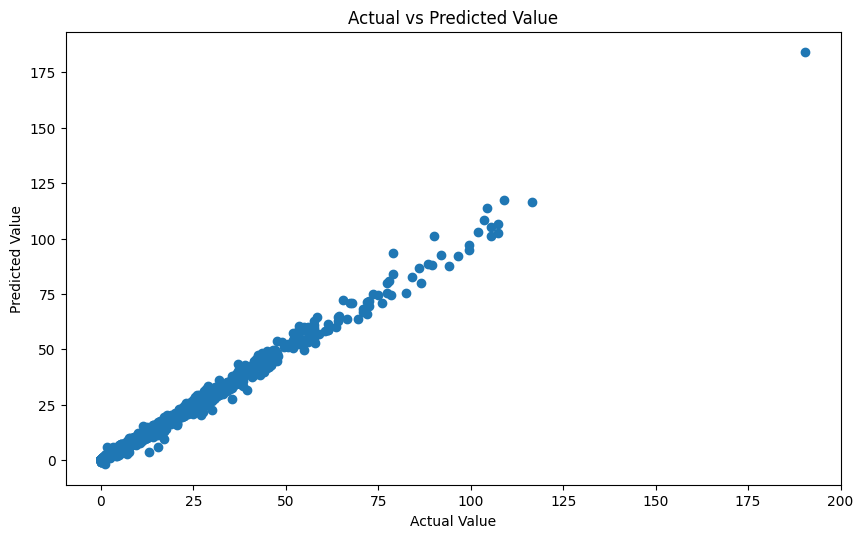

In [93]:
# Actual Values vs Predicted Values
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(y, Y_pred)
plt.title ("Actual vs Predicted Value")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [70]:
intercept=polyreg.named_steps['reg'].intercept_
coefficients=polyreg.named_steps['reg'].coef_
intercept

2.8214245440410344

In [69]:
predictor_names = ['OV', 'AG', 'IR', 'GR', 'RC', 'WA']

# Create the polynomial regression equation string
equation = f'y = {intercept:.2f}'

for i, name in enumerate(predictor_names):
    equation += f' + {coefficients[i]:.2f}*{name}'

for i in range(len(predictor_names)):
    for j in range(i, len(predictor_names)):
        equation += f' + {coefficients[len(predictor_names) + i*(len(predictor_names)-1)//2 + j-i]:.2f}*{predictor_names[i]}*{predictor_names[j]}'

print(equation)

y = 2.82 + 0.00*OV + 0.00*AG + -0.20*IR + 0.26*GR + 0.97*RC + 0.09*WA + -0.29*OV*OV + -96.81*OV*AG + 0.00*OV*IR + -0.20*OV*GR + 0.26*OV*RC + 0.97*OV*WA + 0.00*AG*AG + -0.20*AG*IR + 0.26*AG*GR + 0.97*AG*RC + 0.09*AG*WA + 0.97*IR*IR + 0.09*IR*GR + -0.29*IR*RC + -96.81*IR*WA + -0.29*GR*GR + -96.81*GR*RC + 0.00*GR*WA + -0.00*RC*RC + 0.02*RC*WA + -0.00*WA*WA


In [72]:
# Assume polyreg is a polynomial regression model of degree 2 already fitted to data X and y

# Get the intercept and coefficients of the polynomial equation
intercept = polyreg.named_steps['reg'].intercept_
coefficients = polyreg.named_steps['reg'].coef_

# Define a list of variable names
variable_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

# Print the polynomial equation in the form y = b0 + b1*x1 + b2*x2^2 + b3*x3^3 + ... + bn*x6^2
print("Polynomial equation:")
print("y = {:.4f}".format(intercept), end="")
for i, coef in enumerate(coefficients):
    if i == 0:
        continue
    if i <= 6:
        power = 1
    else:
        power = 2
    variable = variable_names[(i-1) % 6]
    if power == 1:
        print(" + {:.4f}*{}".format(coef, variable), end="")
    else:
        print(" + {:.4f}*{}^2".format(coef, variable), end="")
print()

Polynomial equation:
y = 2.8214 + 0.0000*x1 + -0.1997*x2 + 0.2587*x3 + 0.9678*x4 + 0.0934*x5 + -0.2910*x6 + -96.8053*x1^2 + 0.0000*x2^2 + -0.1997*x3^2 + 0.2587*x4^2 + 0.9678*x5^2 + 0.0934*x6^2 + -0.2910*x1^2 + -96.8053*x2^2 + 0.0045*x3^2 + -0.0046*x4^2 + 0.0176*x5^2 + -0.0003*x6^2 + 0.0144*x1^2 + 3.0362*x2^2 + -0.0027*x3^2 + -0.0899*x4^2 + -0.0030*x5^2 + -0.0053*x6^2 + -0.4261*x1^2 + -0.0306*x2^2 + -0.0394*x3^2 + 0.0049*x4^2 + -5.1102*x5^2 + -0.0021*x6^2 + -0.0010*x1^2 + -0.6933*x2^2 + -0.0004*x3^2 + -0.0987*x4^2 + -130.0905*x5^2


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree regression model with a maximum depth of 3
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Make predictions on the test set and calculate evaluation metrics
y_pred = tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = tree.tree_.node_count # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Feature importances:", tree.feature_importances_)

R-squared: 0.9573
RMSE: 1.48
AIC: 2527.58
BIC: 2618.70
Feature importances: [0. 0. 0. 0. 1. 0.]


In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a decision tree regression model with a maximum depth of 3
tree = DecisionTreeRegressor(max_depth=3, random_state=42)

# Cross-validate the model and print the mean R-squared and RMSE
cv_r2 = cross_val_score(tree, X_train, y_train, cv=5, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print("Cross-validated R-squared: {:.4f}".format(np.mean(cv_r2)))
print("Cross-validated RMSE: {:.2f}".format(np.mean(cv_rmse)))

# Fit the model to the training data and make predictions on the test set
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = tree.tree_.node_count # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Feature importances:", tree.feature_importances_)

Cross-validated R-squared: 0.9531
Cross-validated RMSE: 1.53
R-squared: 0.9573
RMSE: 1.48
AIC: 2527.58
BIC: 2618.70
Feature importances: [0. 0. 0. 0. 0. 1. 0.]


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a random forest regression model with 100 trees and a maximum depth of 3
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set and calculate evaluation metrics
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = np.sum([tree.tree_.node_count for tree in rf.estimators_]) # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Feature importances:", rf.feature_importances_)

R-squared: 0.9807
RMSE: 0.99
AIC: 2948.23
BIC: 12060.20
Feature importances: [8.85870496e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.99114130e-01 0.00000000e+00]


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a random forest regression model with 100 trees and a maximum depth of 3
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)

# Cross-validate the model and print the mean R-squared and RMSE
cv_r2 = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print("Cross-validated R-squared: {:.4f}".format(np.mean(cv_r2)))
print("Cross-validated RMSE: {:.2f}".format(np.mean(cv_rmse)))

# Fit the model to the training data and make predictions on the test set
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = np.sum([tree.tree_.node_count for tree in rf.estimators_]) # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Feature importances:", rf.feature_importances_)

Cross-validated R-squared: 0.9709
Cross-validated RMSE: 1.17
R-squared: 0.9805
RMSE: 1.00
AIC: 2973.75
BIC: 12085.72
Feature importances: [0.         0.00105014 0.         0.         0.         0.99894986
 0.        ]
